In [10]:
import cv2
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

In [11]:
def stretch_contrast(image):
    normalized_image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
    return normalized_image

In [12]:
def equalize_histogram(image):
    equalized_channels = [cv2.equalizeHist(channel) for channel in cv2.split(image)]
    equalized_image = cv2.merge(equalized_channels)
    return equalized_image

In [19]:
def compute_metrics(original, enhanced):
    if len(original.shape) == 2:
        psnr_value = psnr(original, enhanced)
        ssim_value = ssim(original, enhanced)
    elif len(original.shape) == 3:
        channels_original = cv2.split(original)
        channels_enhanced = cv2.split(enhanced)
        psnr_values = [psnr(channels_original[i], channels_enhanced[i]) for i in range(3)]
        ssim_values = [ssim(channels_original[i], channels_enhanced[i]) for i in range(3)]
        psnr_value = np.mean(psnr_values)
        ssim_value = np.mean(ssim_values)
    else:
        raise ValueError("Unsupported image format")

    return psnr_value, ssim_value


In [17]:
def evaluate_algorithm(file_path):
    original_image = cv2.imread(file_path)
    grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    stretched_image = stretch_contrast(grayscale_image)
    equalized_image = equalize_histogram(original_image)
    psnr_stretched, ssim_stretched = compute_metrics(grayscale_image, stretched_image)
    psnr_equalized, ssim_equalized = compute_metrics(original_image, equalized_image)
    plt.figure(figsize=(20, 10))
    plt.subplot(2, 3, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title('Original')
    plt.subplot(2, 3, 2)
    plt.imshow(stretched_image, cmap='gray')
    plt.title(f'Stretched\nPSNR: {psnr_stretched:.2f}, SSIM: {ssim_stretched:.2f}')
    plt.subplot(2, 3, 3)
    plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Equalized\nPSNR: {psnr_equalized:.2f}, SSIM: {ssim_equalized:.2f}')
    plt.show()


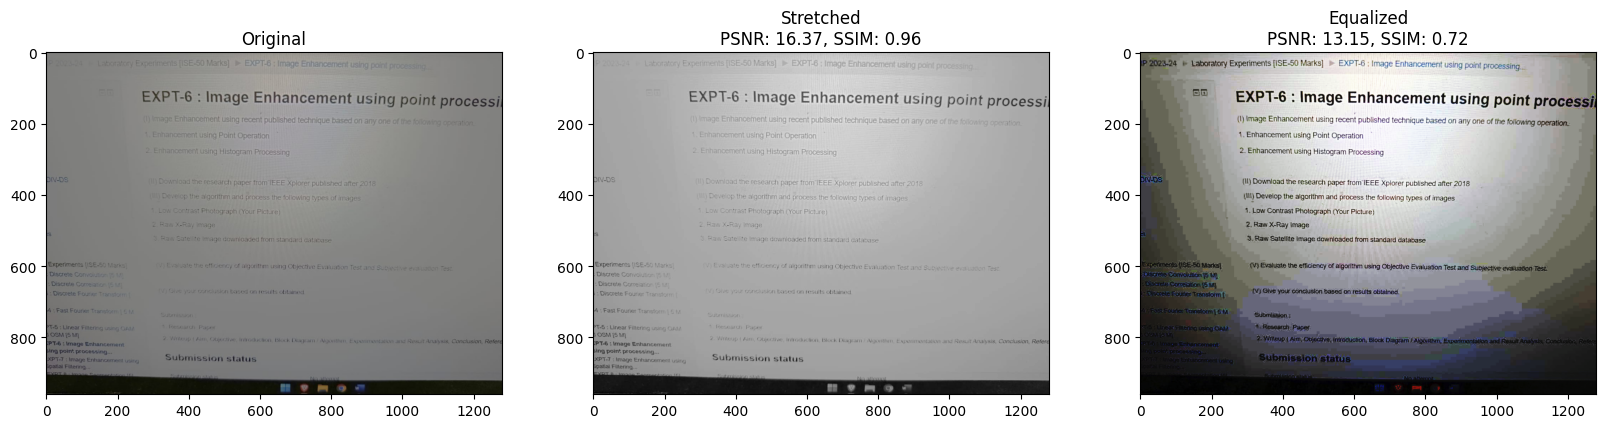

In [20]:
evaluate_algorithm('./images/MyPicture.jpg')

c:\Users\anish\miniconda3\envs\ml\lib\site-packages\skimage\metrics\simple_metrics.py:163: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10((data_range ** 2) / err)


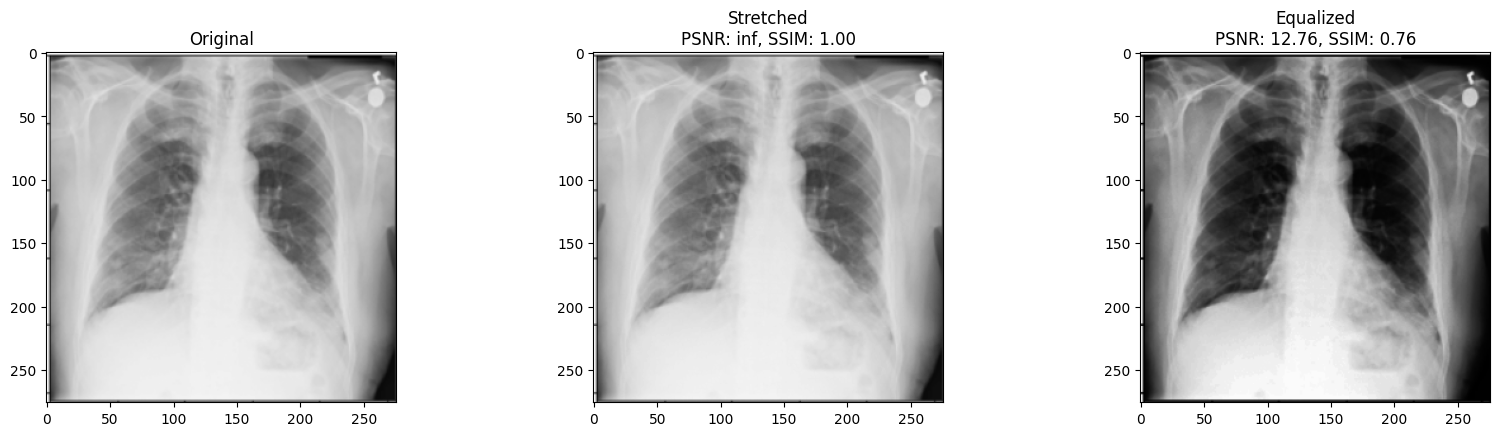

In [21]:
evaluate_algorithm('./images/RawX-Ray.png')

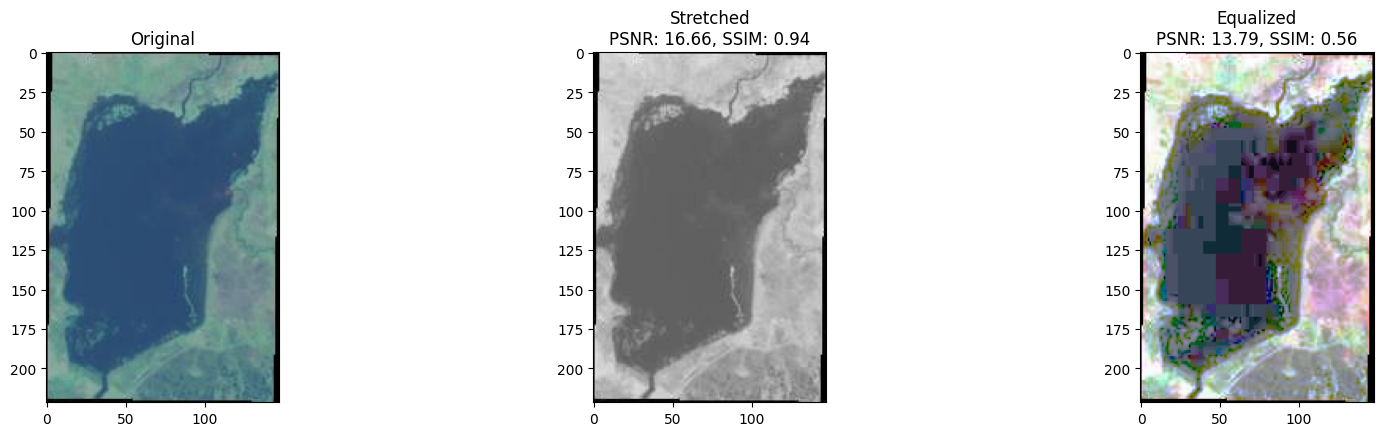

In [22]:
evaluate_algorithm('./images/satellite.jpg')